In [1]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67e-11
Msun=1.989e30
Mjup=1.898e27
AU=149.6e9
InRad=np.pi/180

m1=1*Msun
m2=1*Mjup
m3=40*Mjup

a1=6*AU
a2=100*AU
e1=0.1
e2=0.6
I1=64.7*InRad
I2=0.3*InRad
W1=0*InRad
W2=180*InRad
w1=45*InRad
w2=0*InRad
DW=0.0
f1=45.0*InRad
f2=45.0*InRad

print("Parametros iniciales")
print("e1\t e2\t I1[rad]\t I2[rad]\t w1[rad]\t w2[rad]\n")
print("%.3f\t %.3f\t %.7f\t %.7f\t %.5f\t\t %.5f\t"%(e1,e2,I1,I2,w1,w2))


Parametros iniciales
e1	 e2	 I1[rad]	 I2[rad]	 w1[rad]	 w2[rad]

0.100	 0.600	 1.1292280	 0.0052360	 0.78540		 0.00000	


In [2]:
A1=np.cos(I1)*np.cos(I2)*np.cos(DW)+np.sin(I1)*np.sin(I2)
A2=np.sin(DW)*np.cos(I1)
A3=np.cos(I2)*np.sin(DW)
A4=np.cos(DW)

D1=A1*np.sin(w2)-A2*np.cos(w2)
D2=A3*np.sin(w2)+A4*np.cos(w2)
D3=A3*np.cos(w2)-A4*np.sin(w2)
D4=A1*np.cos(w2)+A2*np.sin(w2)

k1=D1*np.cos(w1)-D2*np.sin(w1)
k2=D1*np.sin(w1)+D2*np.cos(w1)
k3=D3*np.cos(w1)+D4*np.sin(w1)
k4=D4*np.cos(w1)-D3*np.sin(w1)

C3=k1*np.sin(f1)+k2*np.cos(f1)
C4=k3*np.cos(f1)+k4*np.sin(f1)





# Naoz's quadrupolar Hamiltonian

In [3]:
def L1(bulk,orbi):
    m1=bulk[0]
    m2=bulk[1]
    a1=orbi[0]
    value=m1*m2/(m1+m2) * (G*(m1+m2)*a1)**0.5
    return value

def L2(bulk,orbi):
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    a2=orbi[1]
    value=m3*(m1+m2)/(m1+m2+m3) * (G*(m1+m2+m3)*a2)**0.5
    return value

def G1(bulk,e1):
    value=L1(bulk,orbi)*(1-e1**2)**0.5
    return value

def G2(bulk,orbi):
    e2=orbi[3]
    value=L1(bulk,orbi)*(1-e2**2)**0.5
    return value

def beta1(bulk,orbi):
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    a1=orbi[0]
    value=G*m1*m2*L1(bulk,orbi)**2/a1
    return value

def beta2(bulk,orbi):
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    a2=orbi[1]
    value=G*(m1+m2)*m3*L2(bulk,orbi)**2/a2
    return value

def beta3(bulk):
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    value=G**2/16.0 * (m1+m2)**7/(m1+m2+m3)**3 * m3**7/(m1*m2)**3
    return value

def beta4(bulk):
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    value=G**2/4.0 * (m1+m2)**9/(m1+m2+m3)**4 * (m3**9*(m1-m2)/(m1*m2)**5)
    return value


    
bulk=[m1,m2,m3]
orbi=[a1,a2,e1,e2,I1,I2,W1,W2,w1,w2]

m1=bulk[0]
m2=bulk[1]
m3=bulk[2]


def HN(bulk,orbi,e1):
    
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    a1=orbi[0]
    a2=orbi[1]
    e2=orbi[3]
    I1=orbi[4]
    I2=orbi[5]
    W1=orbi[6]
    W2=orbi[7]
    w1=orbi[8]
    w2=orbi[9]
    
    DW = W2-W1
    
    C2=G**2/16 * (m1+m2)**7/(m1+m2+m3)**3 * m3**7/(m1*m2)**3 * L1(bulk,orbi)**4/(L2(bulk,orbi)**3 * G2(bulk,orbi)**3)
    
    value=C2/8*((1+3*np.cos(2*I2))*((2+3*e1**2)*(1+3*np.cos(2*I1))+30*e1**2*np.cos(2*w1)*np.sin(I1)**2) + 
               3*np.cos(2*DW)*(10*e1**2*np.cos(2*w1)*(3+np.cos(2*I1))+4*(2+3*e1**2)*np.sin(I1)**2)*np.sin(I2)**2 + 
               12*(2+3*e1**2-5*e1**2*np.cos(2*w1))*np.cos(DW)*np.sin(2*I1)*np.sin(2*I2) + 
               120*e1**2*np.sin(I1)*np.sin(2*I2)*np.sin(2*w1)*np.sin(DW) - 
               120*e1**2*np.cos(I1)*np.sin(I2)**2*np.sin(2*w1)*np.sin(2*DW))
    
    return value




# Derived Hamiltonian

In [4]:
def Hderived(bulk,orbi,e1,q_quad,q_oct):
    
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    a1=orbi[0]
    a2=orbi[1]
    e2=orbi[3]
    I1=orbi[4]
    I2=orbi[5]
    W1=orbi[6]
    W2=orbi[7]
    w1=orbi[8]
    w2=orbi[9]
    
    DW = W2-W1

    pre_factor_1=2*beta3(bulk)*(L1(bulk,orbi)**4/L2(bulk,orbi)**6)*(1-e2**2)**(-1.5) # Después de dividir por 4\pi^2
    factor_1=(-4+3*k1**2+3*k2**2+3*k3**2+3*k4**2-3*e1**2*(2+k1**2-4*k2**2-4*k3**2+k4**2))
    Hquad=pre_factor_1*factor_1
    
    pre_factor_2 = (15/16.)*(1-e2**2)**(-2.5)*beta4(bulk)*((L1(bulk,orbi)/L2(bulk,orbi))**6 * 1.0/L2(bulk,orbi)**2)
    factor_2 = -e2*e1*(5*(3+4*e1**2)*k2**3-10*(-1+e1**2)*k1*k3*k4 + 
                      k2*(-16+15*k1**2+15*k3**2+5*k4**2-e1**2*(12+15*k1**2-20*k3**2+5*k4**2)))
    Hoct = pre_factor_2*factor_2
    
    return q_quad*Hquad + q_oct*Hoct




# Hamiltonian Hamers 2012

In [5]:
Cquad=(1/16.)*G*m1*m2*m3/((m1+m2)*a2)*(a1/a2)**2 *(1-e2**2)**-1.5
Coct = -15./16*G/4 * m1*m2*m3/(m1+m2)**2*(m1-m2)*(a1/a2)**3 * 1.0/a2 * (1-e2**2)**(-2.5)

Da=np.cos(DW)
Db=np.cos(I1)*np.sin(DW)
Dc=np.cos(I2)*np.sin(DW)
Dd=np.cos(I1)*np.cos(I2)*np.cos(DW)+np.sin(I1)*np.sin(I2)

Za=Da*np.cos(w1)*np.cos(w2)-Db*np.sin(w1)*np.cos(w2)+Dc*np.cos(w1)*np.sin(w2)+Dd*np.sin(w1)*np.sin(w2)
Zb=-Da*np.sin(w1)*np.cos(w2)-Db*np.cos(w1)*np.cos(w2)-Dc*np.sin(w1)*np.sin(w2)+Dd*np.cos(w1)*np.sin(w2)
Zc=-Da*np.cos(w1)*np.sin(w2)+Db*np.sin(w1)*np.sin(w2)+Dc*np.cos(w1)*np.cos(w2)+Dd*np.sin(w1)*np.cos(w2)
Zd=Da*np.sin(w1)*np.sin(w2)+Db*np.cos(w1)*np.sin(w2)-Dc*np.sin(w1)*np.cos(w2)+Dd*np.cos(w1)*np.cos(w2)

Aa = Za*np.cos(f1)+Zb*np.sin(f1)
Ab = Zc*np.cos(f1)+Zd*np.sin(f1)

def HH(bulk,orbi,e1,q_quad,q_oct):
    
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    a1=orbi[0]
    a2=orbi[1]
    e2=orbi[3]
    I1=orbi[4]
    I2=orbi[5]
    W1=orbi[6]
    W2=orbi[7]
    w1=orbi[8]
    w2=orbi[9]
    
    DW = W2-W1
    
    Hquad = Cquad*(6*(Za**2+Zc**2)*(1+4*e1**2)+6*(Zb**2+Zd**2)*(1-e1**2)-4*(2+3*e1**2))
    Hoct = Coct*e1*e2*(Za*(5*(3+4*e1**2)*(Za**2+Zc**2)-4*(3*e1**2+4))
                       +5*(1-e1**2)*(3*Za*Zb**2+Za*Zd**2+2*Zb*Zc*Zd))
    

    
    return q_quad*Hquad+q_oct*Hoct
    

 

In [6]:
print("H derivado = %.16e"%Hderived(bulk,orbi,0.1))
print("H Naoz = %.16e"%HN(bulk,orbi,0.1))
print("H hamers = %.16e"%HH(bulk,orbi,0.1))
print(HH(bulk,orbi,0.1)/Hderived(bulk,orbi,0.1))

TypeError: Hderived() missing 2 required positional arguments: 'q_quad' and 'q_oct'

# Plotting

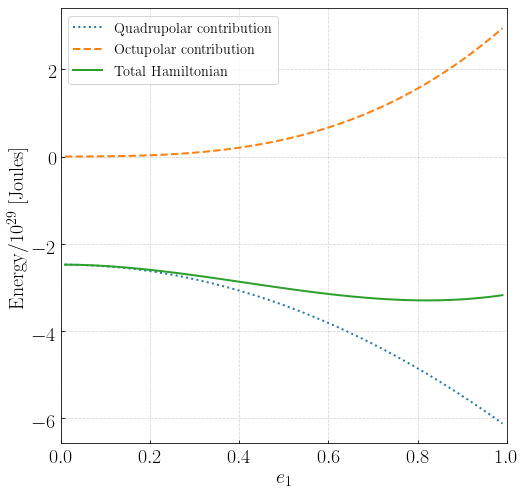

In [55]:

e1=np.linspace(0.01,0.99,100)


# Fancy font. If warning are deployed, uncomment the following two lines
# import warnings
# warnings.filterwarnings("show")
plt.rc('font', **{'family': 'family', 'family': ['serif']})
plt.rc('text', usetex=True) #uses Latex instead of Tex to compile axes labels


fig=plt.figure(figsize=(8,8))
ax=plt.axes()
#ax.plot(e1,HN(bulk,orbi,e1)/1e36,label='Hamiltoniano Naoz')
ax.plot(e1,Hderived(bulk,orbi,e1,1,0)/1e29,':',label='Quadrupolar contribution',linewidth=2.0)
ax.plot(e1,Hderived(bulk,orbi,e1,0,1)/1e29,'--',label='Octupolar contribution',linewidth=2.0)
ax.plot(e1,Hderived(bulk,orbi,e1,1,1)/1e29,'-',label='Total Hamiltonian',linewidth=2.0)
#ax.plot(e1,HH(bulk,orbi,e1,1,1),label='Hamiltoniano Hamers')
ax.legend(fontsize='x-large')

ax.set_xlabel("$e_1$",fontsize=20)
ax.set_ylabel('$\mathrm{Energy}/10^{29}$ [Joules]',fontsize=20)

ax.set_xlim(0.0,1.0)

ax.grid(alpha=0.5,linestyle='dashed')

ax.tick_params(direction='in',labelsize=20)

fig.savefig("prueba_2.eps")
plt.show()


# Hamers 2012

In [ ]:


H_quad_hamers=8.0*Cquad*((1-e1**2)/(1+e1*np.cos(f1)))**2 * (1.5*Aa**2 + 1.5*Ab**2 - 1)
factor1_hamers=(1.5*Aa**2 + 1.5*Ab**2 - 1)
#H_quad_hamers=(1.5*Aa**2 + 1.5*Ab**2 - 1)

print(H_quad_hamers)

# Portilla-Revelo 2018

In [ ]:



print("A1=%.16f"%A1)
print("A2=%.16f"%A2)
print("A3=%.16f"%A3)
print("A4=%.16f"%A4)
print("\n")
print("D1=%.16f"%D1)
print("D2=%.16f"%D2)
print("D3=%.16f"%D3)
print("D4=%.16f"%D4)
print("\n")

print("k1=%.16f"%k1)
print("k2=%.16f"%k2)
print("k3=%.16f"%k3)
print("k4=%.16f"%k4)
print("\n")
print("Za=%.16f"%Za)
print("Zb=%.16f"%Zb)
print("Zc=%.16f"%Zc)
print("Zd=%.16f"%Zd)
print("\n")

print("Aa=%.16f"%Aa)
print("Ab=%.16f"%Ab)
print("\n")
print("C3=%.16f"%C3)
print("C4=%.16f"%C4)


Cphi_hamers=Aa*np.cos(f2)+Ab*np.sin(f2)
Cphi_portilla=C3*np.cos(f2)+C4*np.sin(f2)

"""
factor1=-0.25*np.pi/(-1+e2**2)**3 * ((-8-12*e2**2+3*((4+9*e2**2)*k2**2+(4+3*e2**2)*k3**2)*np.cos(f1)**2 + 
                                            3*((4+9*e2**2)*k1**2+(4+3*e2**2)*k4**2)*np.sin(f1)**2+
                                            12*k1*k2*np.sin(2*f1)+27*e2**2*k1*k2*np.sin(2*f1)+ 
                                            12*k3*k4*np.sin(2*f1)+9*e2**2*k3*k4*np.sin(2*f1)))
"""

factor1=-0.25/((-1+e2**2)**3)*np.pi*(4*(-2+3*C3**2+3*C4**2)+
                                     3*(-4+9*C3**2+3*C4**2)*e2**2) 
factor2=(1-e1**2)/(1+e1*np.cos(f1))**2
factor3=8*beta3(bulk)*(L1(bulk,orbi)**4/L2(bulk,orbi)**6)
H_quad_portilla=factor1*factor2*factor3

#print(Cquad)
#print(factor3)

#print(factor1)
#print(f1)

#print("H_quad_hamers=%.16e"%H_quad_hamers)
#print("H_quad_portilla=%.16e"%H_quad_portilla)

print("factor_1_portilla=%.16f"%factor1)
print("factor_1_hamers=%.16f"%factor1_hamers)

#print("Cphi_portilla=%.16f"%Cphi_portilla)
#print("Cphi_hamers=%.16f"%Cphi_hamers)



